# Determine single crystal diffraction pattern

In [7]:
# This block finds where is the location of Mantid's python interface. No need to modify.
from __future__ import print_function
import subprocess
import os
import sys
process = subprocess.Popen(['which', 'MantidPlot'], stdout=subprocess.PIPE)
out, err = process.communicate()
mantidbin = os.path.dirname(out)
sys.path.append(mantidbin)

In [9]:
# Load the neccessary environment. No need to modify.
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from mantid import plots, mtd
from mantid.simpleapi import BASISCrystalDiffraction

### Reduction step
Reduction of an angle scan can take between 10 minutes and 1/2 hour. You can try first with only one run number and one vanadium run.


Documentation of [BASISCrystalDiffraction](http://docs.mantidproject.org/nightly/algorithms/BASISCrystalDiffraction-v1.html) algorithm

In [6]:

BASISCrystalDiffraction(SingleCrystalDiffraction=True,
                        RunNumbers='74799-74869',   # Here use your own runs
                        VanadiumRuns='75524-75526', # Ask the instrument scientist for the appropriate vanadium runs
                        BackgroundRuns='75527',     # Here use your own run
                        PsiAngleLog='SE50Rot',
                        PsiOffset=-27.0,
                        LatticeSizes=[10.71, 10.71, 10.71],
                        LatticeAngles=[90.0, 90.0, 90.0],
                        VectorU=[1, 1, 0],
                        VectorV=[0, 0, 1],
                        Uproj=[1, 1, 0],
                        Vproj=[0, 0, 1],
                        Wproj=[1, -1, 0],
                        Nbins=400,
                        OutputWorkspace='peaks')

MDHistoWorkspace
Title: 
Dim 0: ([H,H,0]) -3.63829 to 3.63829 in 400 bins. Id=Q1
Dim 1: ([0,0,L]) -3.63829 to 3.63829 in 400 bins. Id=Q2
Dim 2: ([H,-H,0]) -3.63829 to 3.63829 in 1 bins. Id=Q3

Inelastic: ki-kf
Instrument: BASIS (2014-Jan-01 to 2100-Jan-31)Instrument from: /home/jbq/repositories/mantidproject/mantid0/instrument/BASIS_Definition_20140101-.xml

Parameters from: /home/jbq/repositories/mantidproject/mantid0/instrument/BASIS_Parameters.xml
Run start: 2017-Sep-19 22:08:45
Run end:  2017-Sep-19 22:09:11
Sample: a 10.7, b 10.7, c 10.7; alpha 90, beta 90, gamma 90


## Visualization of results

Workspace `peaks` is a multidimensional workspace with two binned dimensions which can be plotted as intensity colored matplotlib figure

<IPython.core.display.Javascript object>


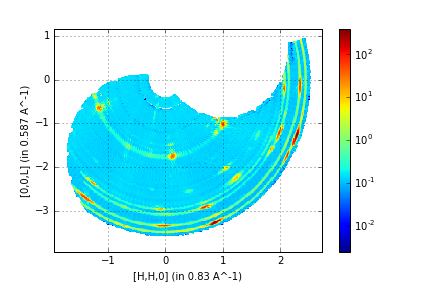

In [11]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(mtd['peaks'], norm=LogNorm())
fig.colorbar(c)
plt.grid()
fig.show()